# Explore here

In [1]:
# Your code here
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# modelado
from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest

archivo = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

df_original = pd.read_csv(archivo)
df=pd.read_csv(archivo)

# Obtener las dimensiones
datos,atributos=df.shape
print(f"Contamos con {datos} cantidad de datos y {atributos} atributos.")
print()
# Obtener información sobre tipos de datos y valores no nulos
df.info()



Contamos con 48895 cantidad de datos y 16 atributos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 n

- Contamos con un total de 48.895 filas (alojamientos a alquilar) y 16 columnas, distintos atributos de los departamentos.
- Tanto la variable last_review como la variable reviews_per_month tienen más de 10000 valores nulos.
- Las variables name y host_name también cuentan con valores nulos, pero más reducido que lo anterior.
- El resto de las variables cuentan con todos los valores.
- Los datos cuentan con 10 características numéricas y 6 características categóricas.

In [2]:
#Búsqueda y eliminación de duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()


# sin considerar el id
df.drop("id", axis = 1).duplicated().sum()

np.int64(0)

No se han registrado datos duplicados en nuestro DataSet.

### **Objetivo:** 
Predecir el valor de alquiler de un nuevo alojamiento.

### Selección de atributos relevantes:

Vamos a eliminar los siguientes atributos:
- id, name, host_id, host_name: Por ser algo individual.
- last_review, reviews_per_month: Por tener varios datos nulos y no ser relevante para nuestro análisis (un nuevo alojamiento no tendrá reviews).

In [3]:
# Selección de atributos relevantes
df_filtrado=df
df_filtrado.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)

df_filtrado.head()



,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### Análisis univariante

In [4]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


Tenemos 3 variables categóricas:
- neighbourhood_group
- neighbourhood
- room_type

In [5]:
df_filtrado.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [6]:
df_filtrado.neighbourhood.value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [7]:
df_filtrado.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

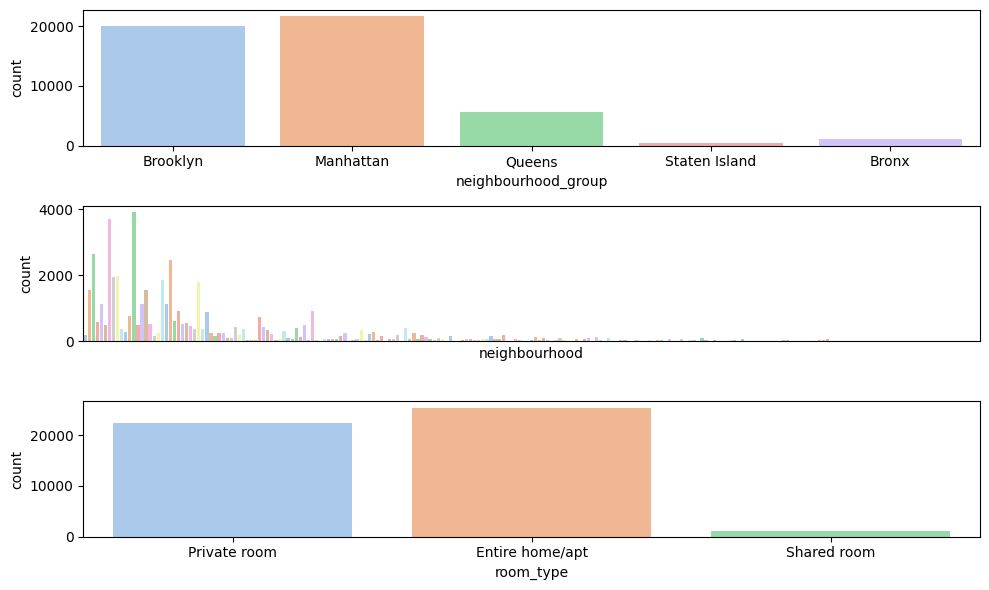

In [8]:
fig, axis = plt.subplots(3, 1, figsize = (10, 6))

sns.countplot(ax = axis[0], data = df_filtrado, x = "neighbourhood_group", palette='pastel', hue= "neighbourhood_group", legend=False)
sns.countplot(ax = axis[1], data = df_filtrado, x = "neighbourhood", palette='pastel', hue= "neighbourhood", legend=False).set_xticks([])
sns.countplot(ax = axis[2], data = df_filtrado, x = "room_type", palette='pastel', hue= "room_type", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Con la representación de cada variable podemos determinar que:
- neighbourhood_group: La mayoría de los alojamientos se sitúan entre Brooklyn y Manhattan; alrededor de un 15% se sitúa en Queens y un muy pequeño porcentaje se sitúa en Bronx y Staten Island.
- neighbourhood: Está dividido en 221 barrios, de los cuales Williamsburg y Bedford-Stuyvesant cuentan con casi 4.000 propiedades; Harlem y Bushwick alrededor de 2.500 propiedades y casi el 90% de los barrios cuentan con menos de 500 propiedades (500 prop equivale aproximadamente al 1% del total del dataset).
- room_type: La mayoría de los alojamientos son casas o apartamentos enteros y habitaciones privadas, mientras que un bajo porcentaje es de habitaciones compartidas.

Tenemos 7 variables numéricas:
- latitude
- longitude 
- price 
- minimum_nights 
- number_of_reviews 
- calculated_host_listings_count 
- availability_365


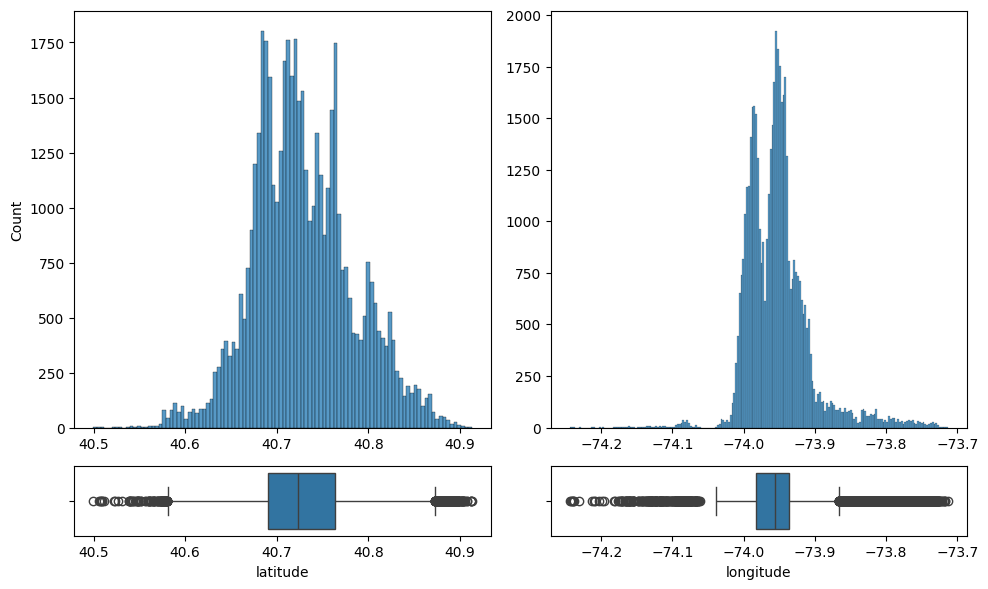

In [9]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_filtrado, x = "latitude").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_filtrado, x = "latitude")

sns.histplot(ax = axis[0, 1], data = df_filtrado, x = "longitude").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_filtrado, x = "longitude")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Podemos observar que la mayoría de las propiedades de sitúan alrededor de la latitud 40.75 y la longitud -73.95.

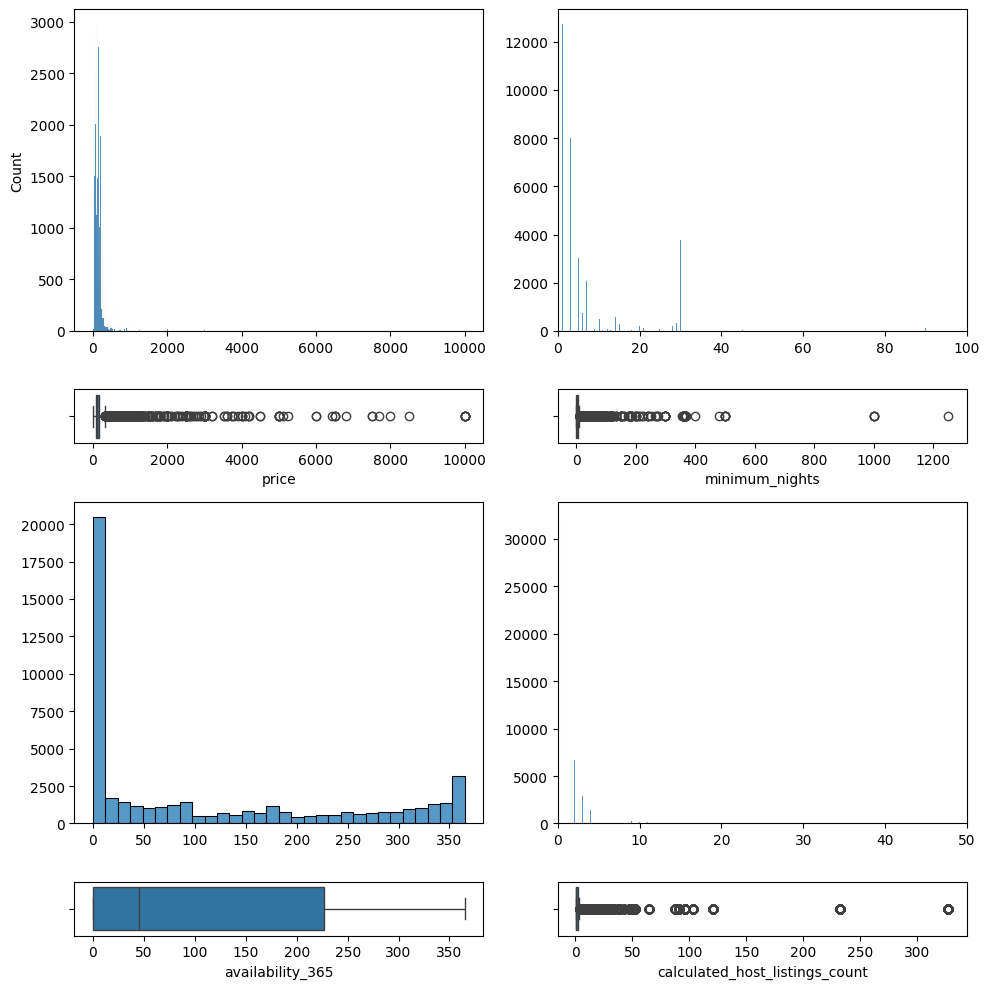

In [10]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_filtrado, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_filtrado, x = "price")

sns.histplot(ax = axis[0, 1], data = df_filtrado, x = "minimum_nights").set(xlabel = None, ylabel = None, xlim=(0,100))
sns.boxplot(ax = axis[1, 1], data = df_filtrado, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df_filtrado, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df_filtrado, x = "availability_365")

sns.histplot(ax = axis[2, 1], data = df_filtrado, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None, xlim=(0,50))
sns.boxplot(ax = axis[3, 1], data = df_filtrado, x = "calculated_host_listings_count")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Podemos observar que todas las variables tienen valores atípicos. 

### Análisis multivariante

Análisis de correlación para variables numéricas:

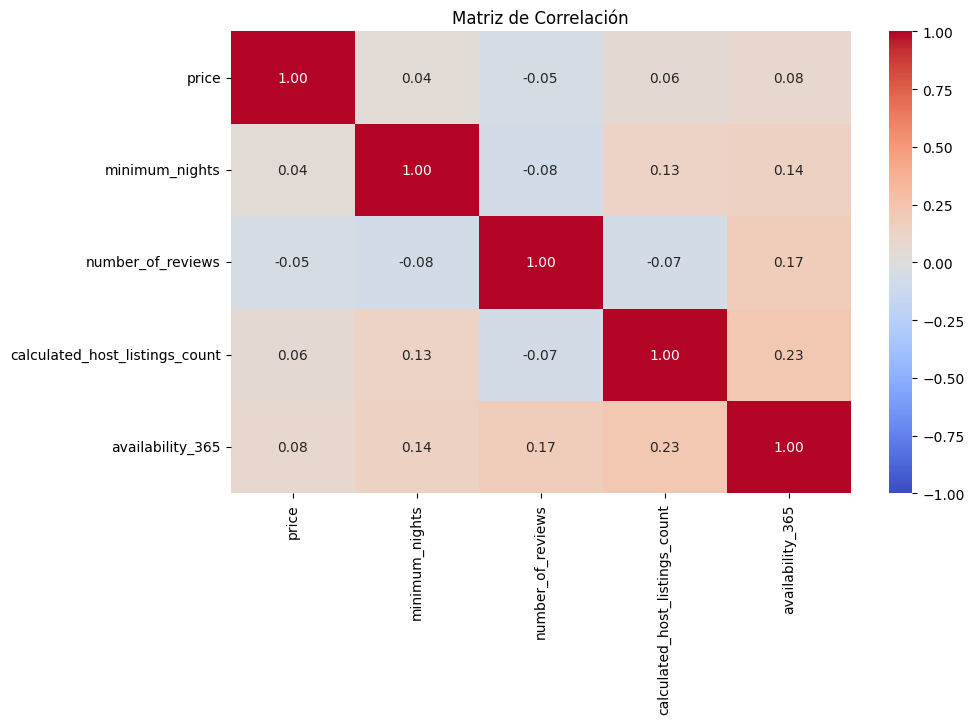

In [11]:
# Filtrar variables numéricas
num_vars = df_filtrado.select_dtypes(include=['int64', 'float64']).drop(columns=['longitude', 'latitude'])

# Matriz de correlación
correlation_matrix = num_vars.corr()

# Visualizar con un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

No se detectan correlación entre las variable numéricas.

Factorización de variables categóricas

In [12]:
df_filtrado["room_type_n"] = pd.factorize(df_filtrado["room_type"])[0]
df_filtrado["neighbourhood_group_n"] = pd.factorize(df_filtrado["neighbourhood_group"])[0]
df_filtrado["neighbourhood_n"] = pd.factorize(df_filtrado["neighbourhood"])[0]
df_filtrado.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0,1,2
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1,0,3
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1,4


Análisis de correlación de todas las variables: Categóricas (factorizadas) y numéricas:

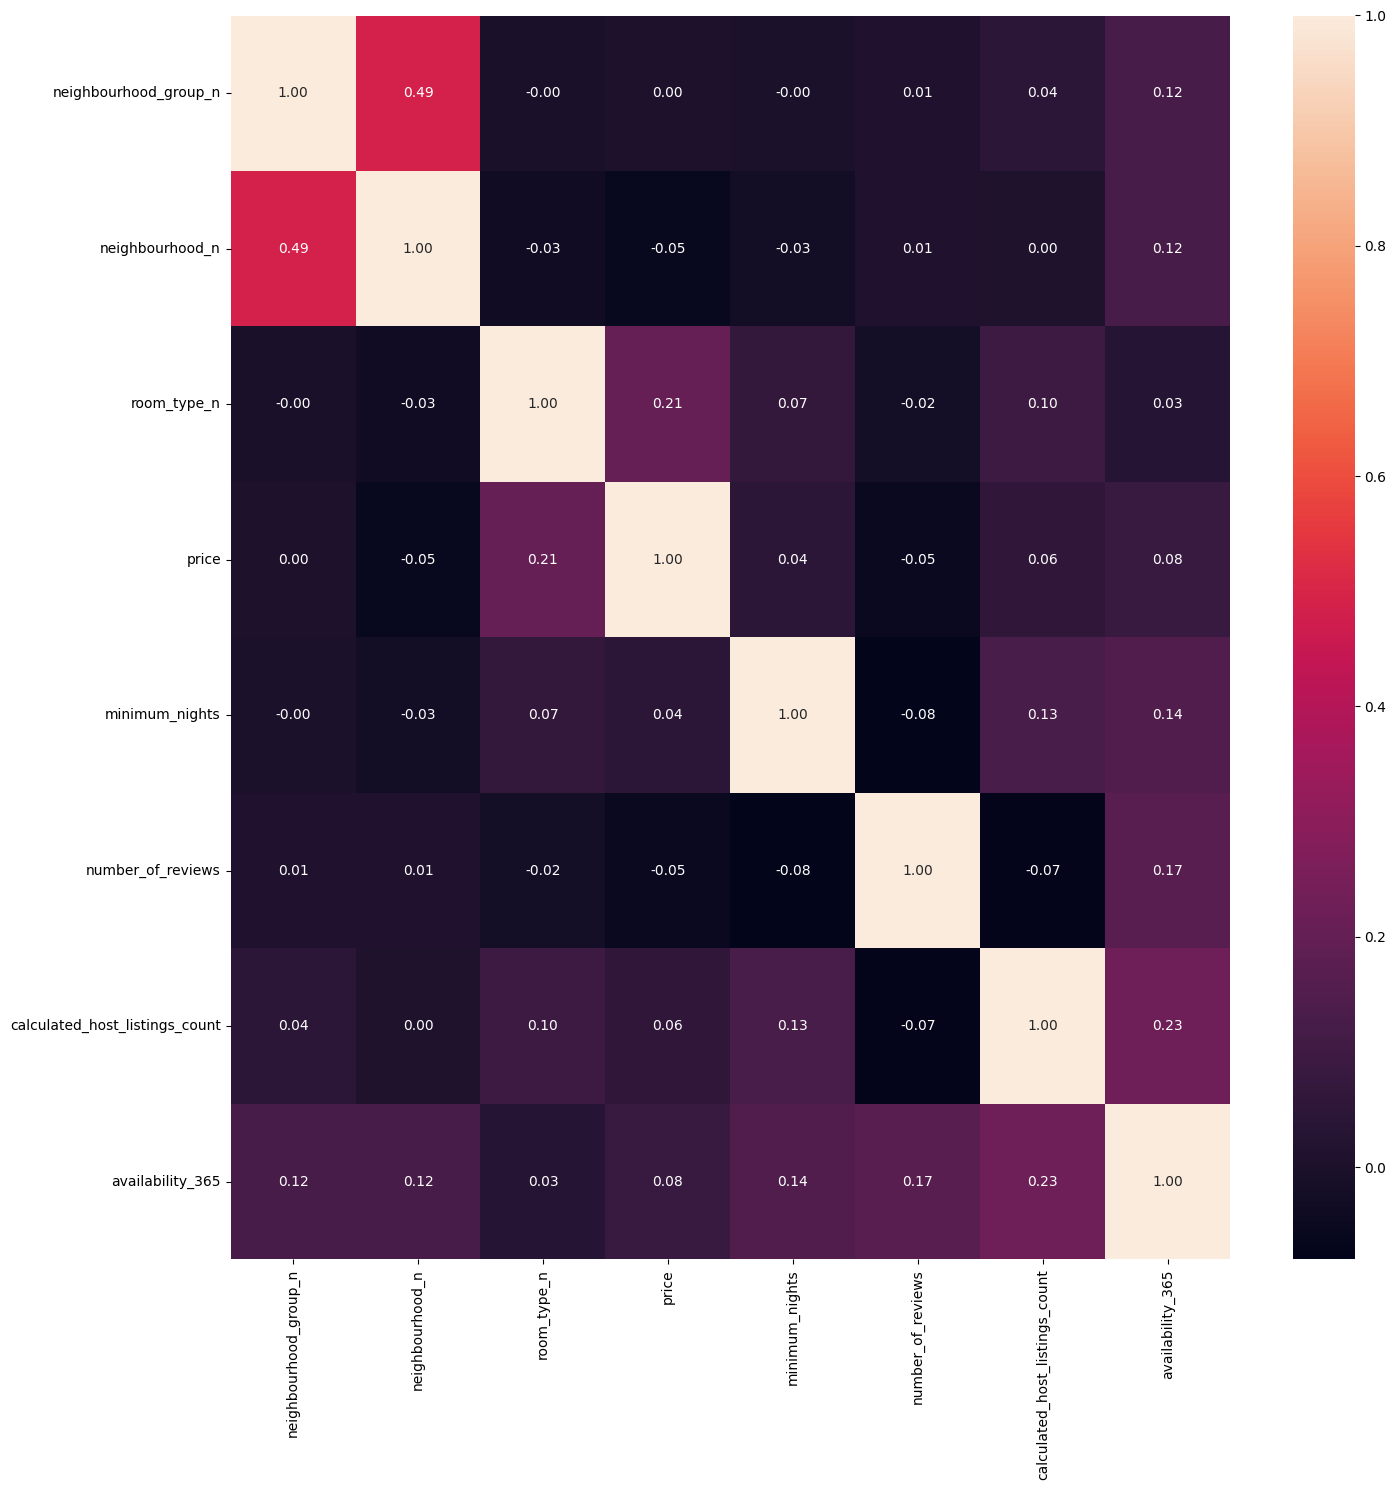

In [13]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df_filtrado[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

Observamos que la correlación entre todas las variables es muy baja.

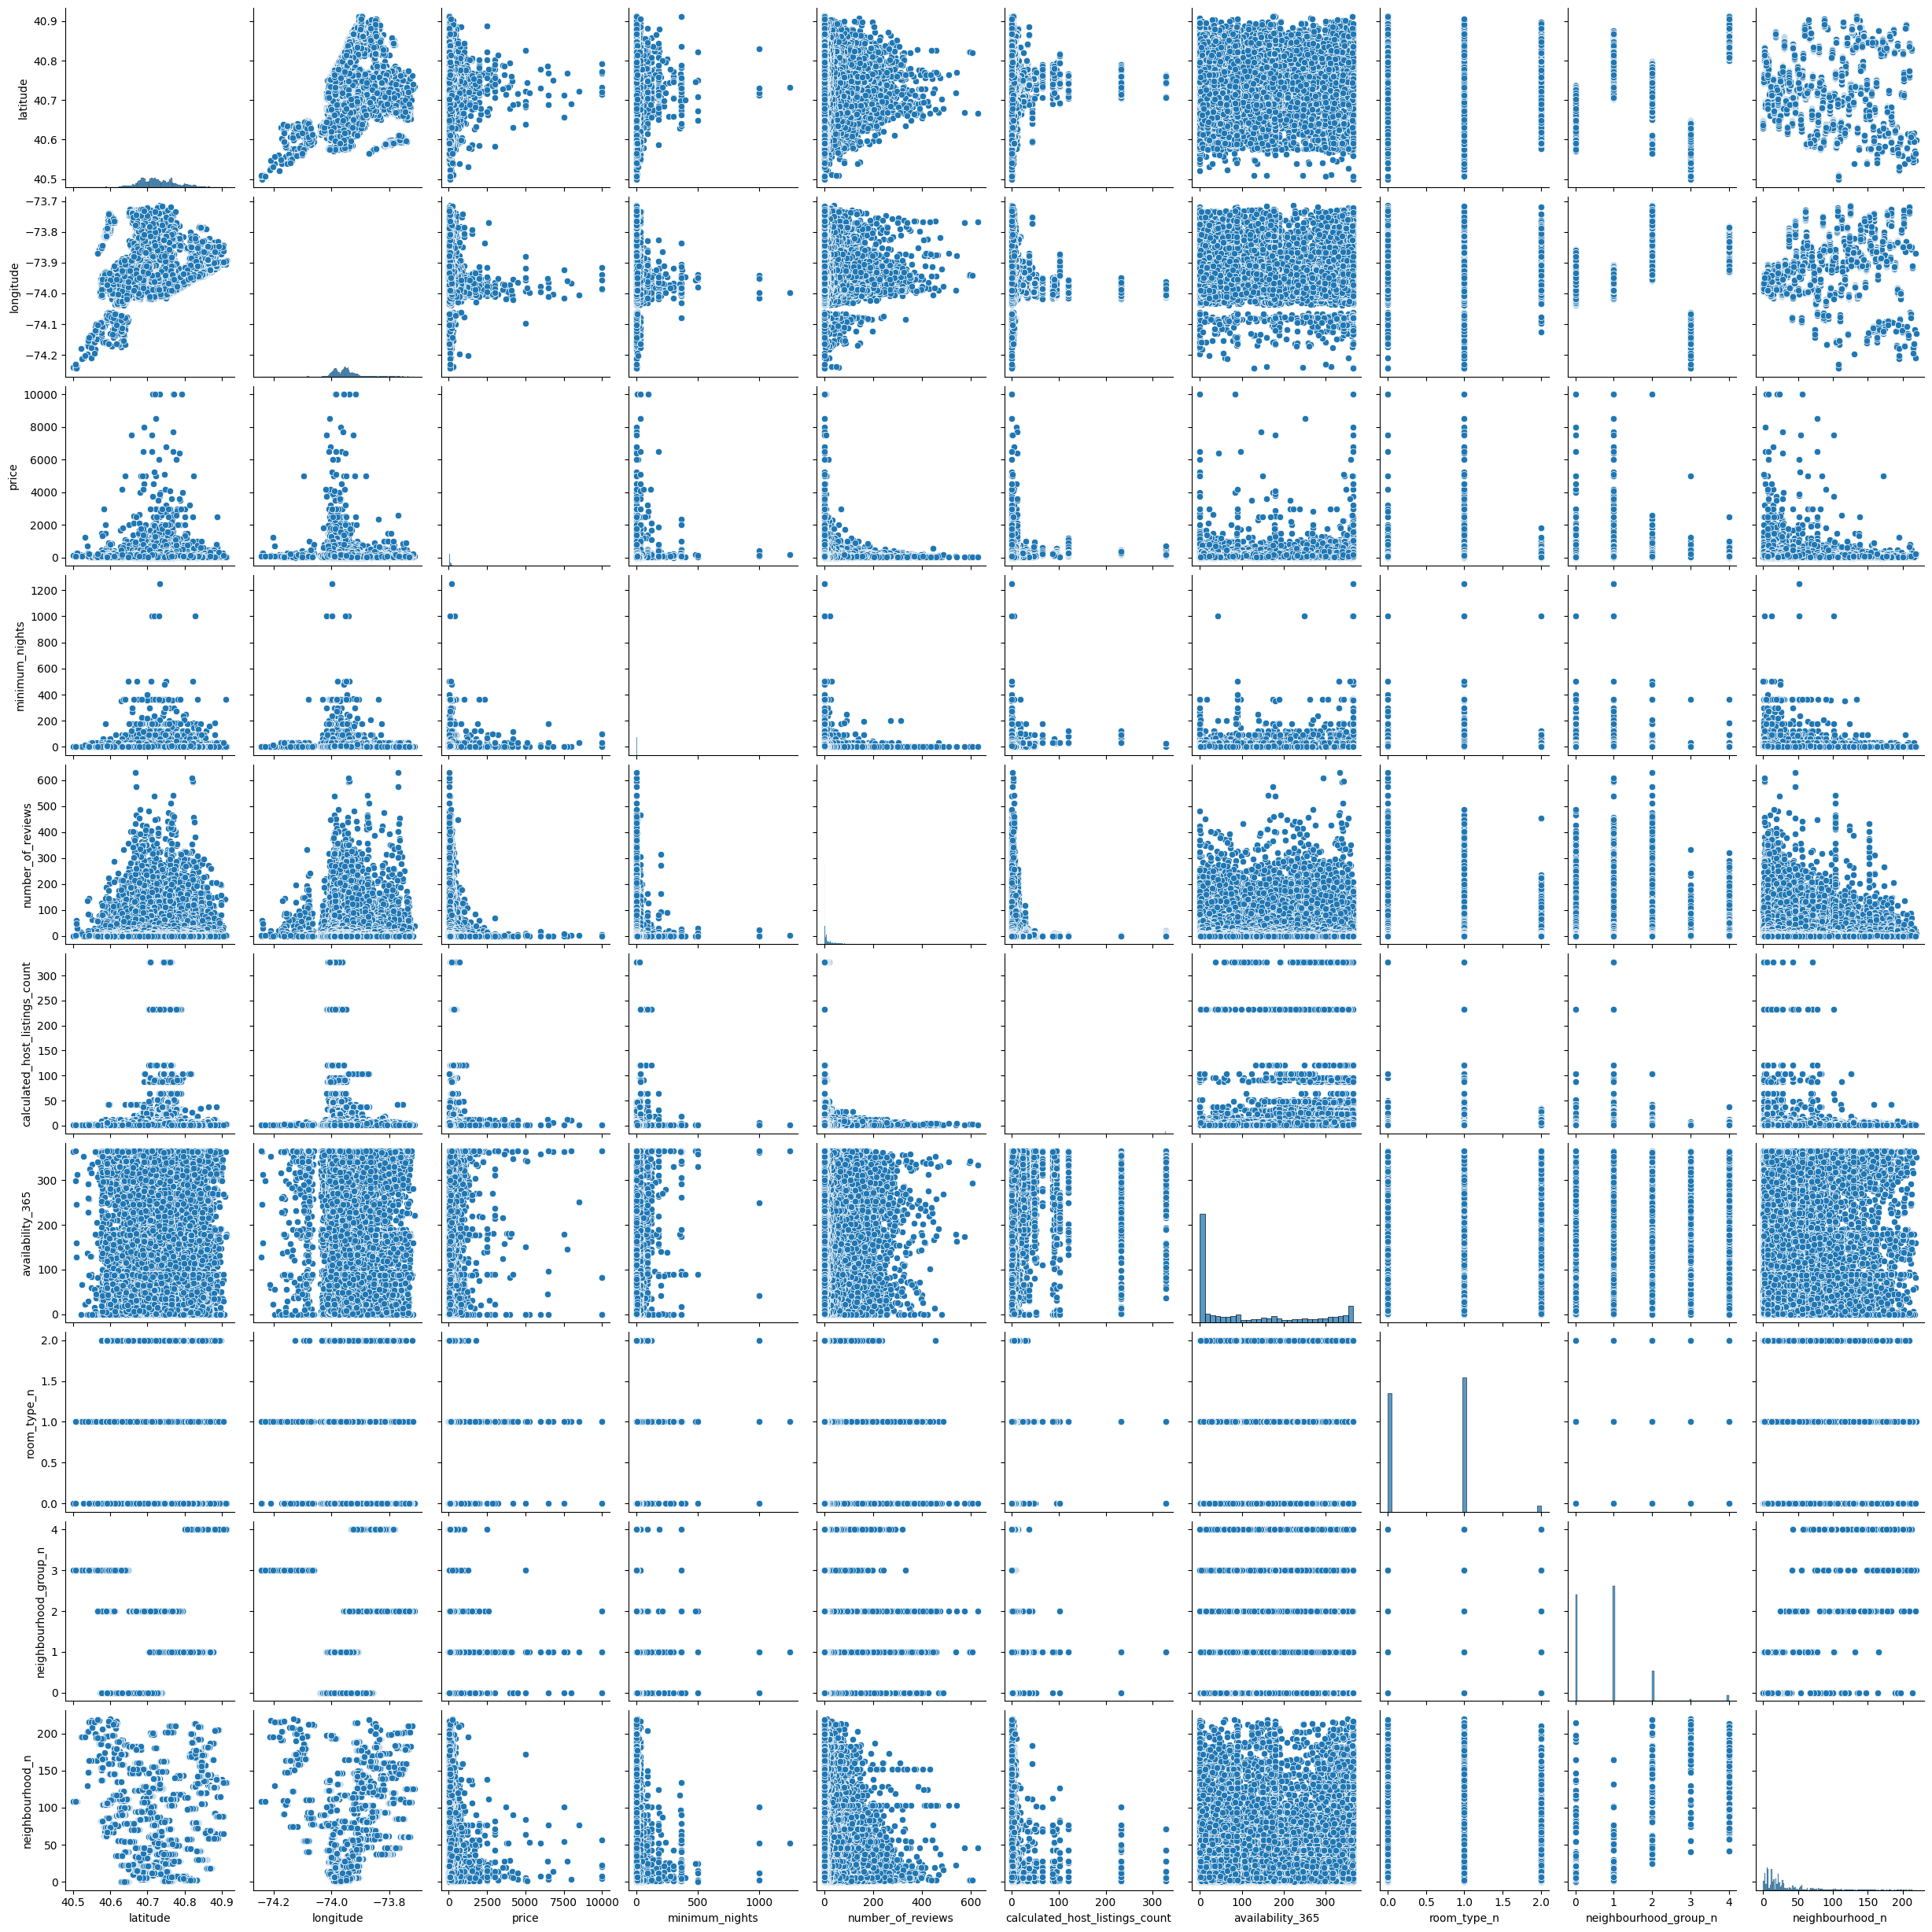

In [14]:
# relaciones todos con todos
sns.pairplot(data = df_filtrado)

### Análisis de valores atípicos:

In [15]:
df_filtrado.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,0.567113,0.786911,29.888782
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,0.541249,0.844386,34.676634
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000,19.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000,37.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,2.000000,4.000000,220.000000


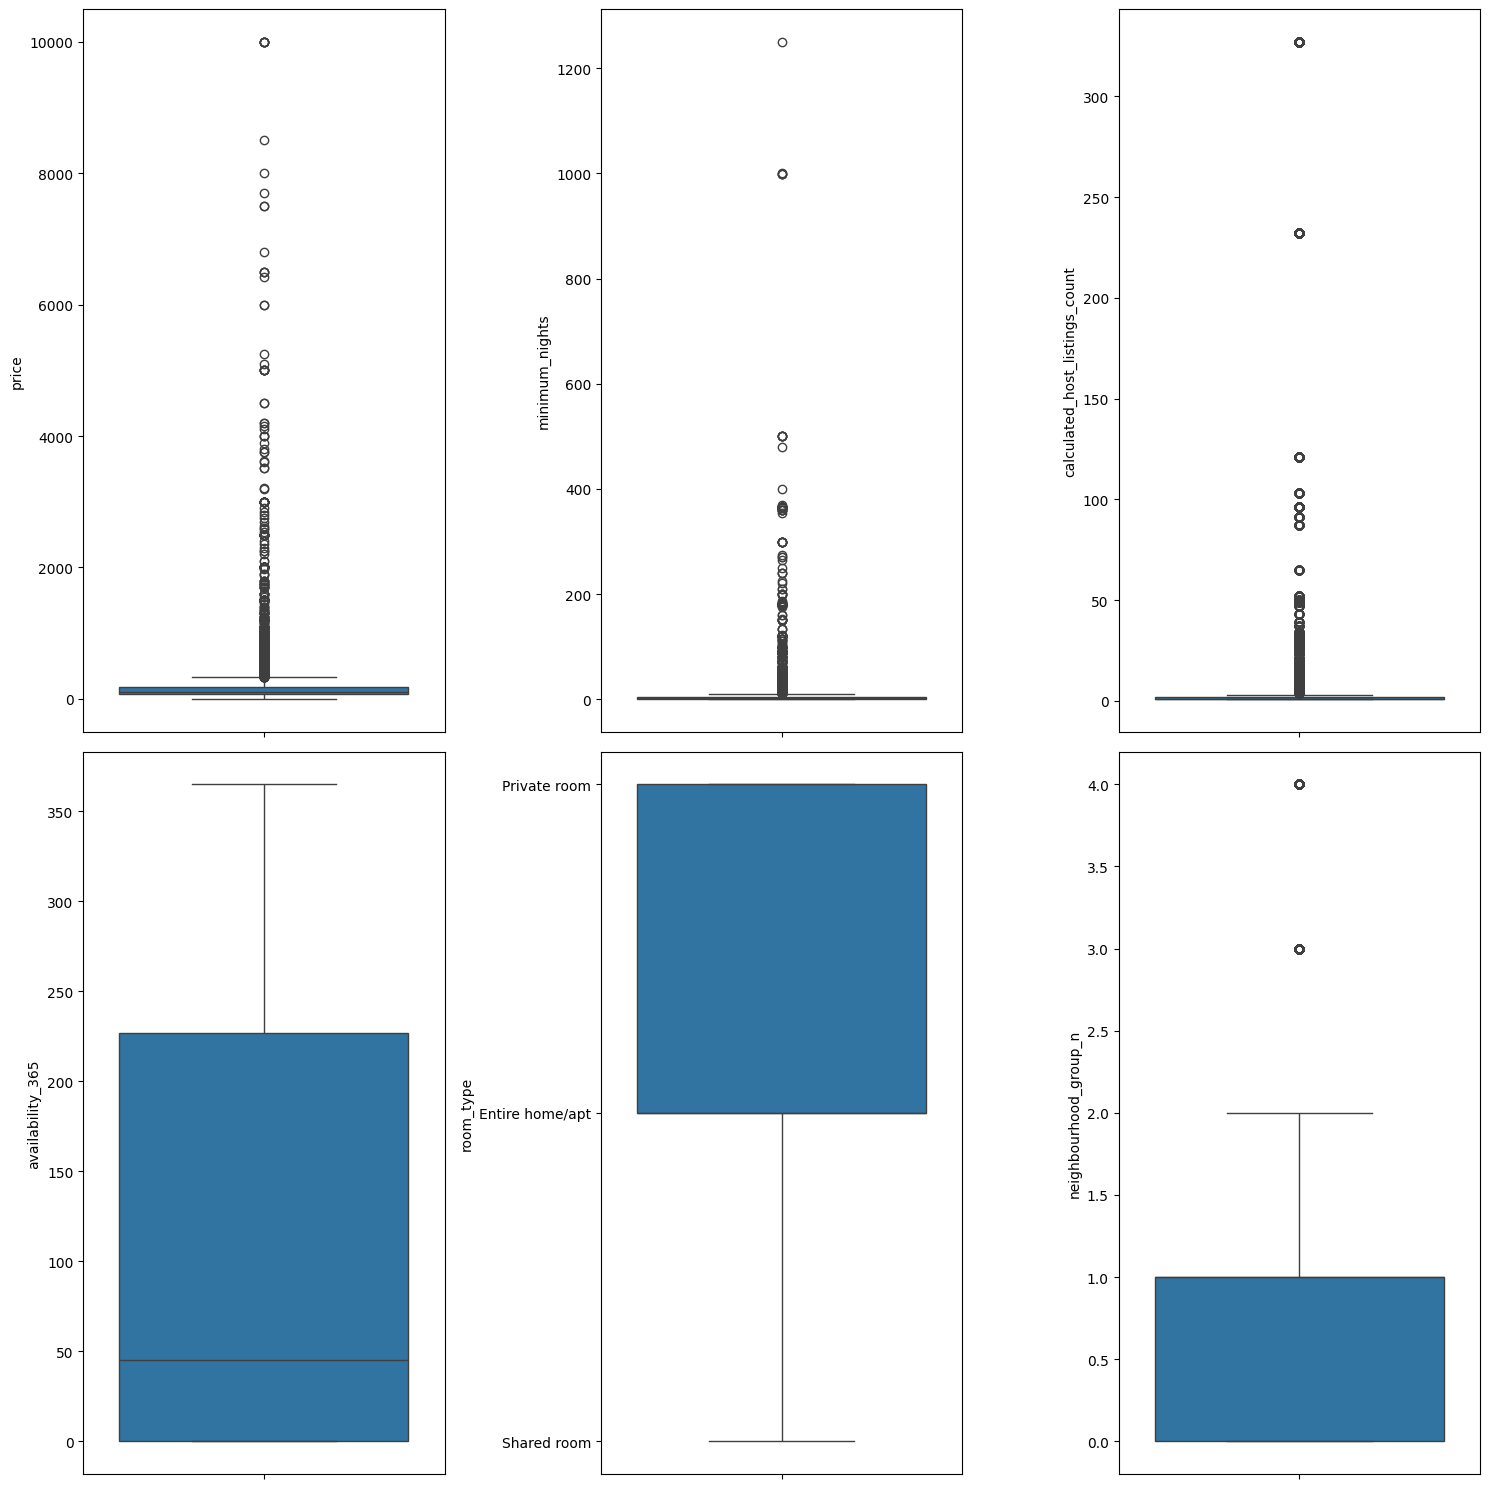

In [16]:
fig, axes = plt.subplots(2, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df_filtrado, y = "price")
sns.boxplot(ax = axes[0, 1], data = df_filtrado, y = "minimum_nights")
sns.boxplot(ax = axes[0, 2], data = df_filtrado, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 0], data = df_filtrado, y = "availability_365")
sns.boxplot(ax = axes[1, 1], data = df_filtrado, y = "room_type")
sns.boxplot(ax = axes[1, 2], data = df_filtrado, y = "neighbourhood_group_n")


plt.tight_layout()

plt.show()

Observamos valores atípicos en las variables price, minimum_nights, calculated_host_listings_count, neighbourhood_group_n.

In [17]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) de price

Q1_price = df_filtrado['price'].quantile(0.25)
Q3_price = df_filtrado['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Definir los límites inferior y superior
lower_limit_price = Q1_price - 1.5 * IQR_price
upper_limit_price = Q3_price + 1.5 * IQR_price

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_price, 2)} y {round(lower_limit_price, 2)}, con un rango intercuartílico de {round(IQR_price, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [18]:
# outliers extremos de price.

lower_limit_price = Q1_price - 3 * IQR_price
upper_limit_price = Q3_price + 3 * IQR_price

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_price, 2)} y {round(lower_limit_price, 2)}, con un rango intercuartílico de {round(IQR_price, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 493.0 y -249.0, con un rango intercuartílico de 106.0


In [19]:
# Limpiado de outliers de precio
df_filtrado = df_filtrado[(df_filtrado["price"] > 0) & (df_filtrado["price"]<=493)]
df_filtrado["price"].describe()

count    47556.000000
mean       129.364707
std         83.587039
min         10.000000
25%         68.000000
50%        100.000000
75%        170.000000
max        490.000000
Name: price, dtype: float64

In [20]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) de minimum_nights

Q1_mn = df_filtrado['minimum_nights'].quantile(0.25)
Q3_mn = df_filtrado['minimum_nights'].quantile(0.75)
IQR_mn = Q3_mn - Q1_mn

# Definir los límites inferior y superior extremos de minimum_nights
lower_limit_mn = Q1_mn - 3 * IQR_mn
upper_limit_mn = Q3_mn + 3 * IQR_mn

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_mn, 2)} y {round(lower_limit_mn, 2)}, con un rango intercuartílico de {round(IQR_mn, 2)}")

df_filtrado["minimum_nights"].describe()

Los límites superior e inferior para la búsqueda de outliers son 17.0 y -11.0, con un rango intercuartílico de 4.0


count    47556.000000
mean         6.975482
std         20.353917
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [21]:
# Limpiado de outliers de minimum_nights
df_filtrado = df_filtrado[df_filtrado["minimum_nights"]<=17]
df_filtrado["minimum_nights"].describe()

count    42161.000000
mean         2.974716
std          2.533977
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         17.000000
Name: minimum_nights, dtype: float64

Aca observamos que se han eliminado alrededor de 5.000 datos.

In [22]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) de calculated_host_listings_count

Q1_chlc = df_filtrado['calculated_host_listings_count'].quantile(0.25)
Q3_chlc = df_filtrado['calculated_host_listings_count'].quantile(0.75)
IQR_chlc = Q3_chlc - Q1_chlc

# Definir los límites inferior y superior extremos de calculated_host_listings_count
lower_limit_chlc = Q1_chlc - 3 * IQR_chlc
upper_limit_chlc = Q3_chlc + 3 * IQR_chlc

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_chlc, 2)} y {round(lower_limit_chlc, 2)}, con un rango intercuartílico de {round(IQR_chlc, 2)}")

df_filtrado["minimum_nights"].describe()

Los límites superior e inferior para la búsqueda de outliers son 5.0 y -2.0, con un rango intercuartílico de 1.0


count    42161.000000
mean         2.974716
std          2.533977
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         17.000000
Name: minimum_nights, dtype: float64

El upper_limit no está muy distante del valor máximo es la variable calculated_host_listings_count. Los valores superiores a dicho límite no los consideraremos valor atípico.

### Análisis de valores faltantes.

In [23]:
df_filtrado.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neighbourhood_group_n             0
neighbourhood_n                   0
dtype: int64

No contamos con valores NaN en nuestro dataframe.

### Escalado

In [24]:
# Dividimos el conjunto de datos en muestras de train y test
X = df_filtrado.drop("price", axis = 1)
y = df_filtrado["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
44707,Manhattan,Harlem,40.81155,-73.94339,Entire home/apt,4,3,1,0,1,1,2
13136,Manhattan,Hell's Kitchen,40.75578,-73.99523,Private room,2,26,1,30,0,1,7
12857,Manhattan,Greenwich Village,40.72939,-74.00225,Entire home/apt,2,0,1,0,1,1,52
37211,Manhattan,Greenwich Village,40.73429,-73.99675,Entire home/apt,5,1,4,89,1,1,52
13371,Manhattan,East Harlem,40.80681,-73.93956,Private room,3,4,1,0,0,1,4


In [25]:
num_variables = ["minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]

# instancio el escalador
scaler = StandardScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[num_variables])

# aplico el escalador en ambos
X_train_num_scal = scaler.transform(X_train[num_variables])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_variables)

X_test_num_scal = scaler.transform(X_test[num_variables])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_variables)

X_train_num_scal.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
44707,0.399124,-0.481875,-0.106570,-0.785593
13136,-0.386820,0.011922,-0.106570,-0.545608
12857,-0.386820,-0.546283,-0.106570,-0.785593
37211,0.792095,-0.524814,0.034151,-0.073638
13371,0.006152,-0.460406,-0.106570,-0.785593


### Codificación

In [26]:
import numpy as np

cat_variables = ["neighbourhood_group", "neighbourhood", "room_type"]

# Label encoding

X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

# instancio el encoder
label_encoder_ng = LabelEncoder()
label_encoder_n = LabelEncoder()
label_encoder_rt = LabelEncoder()

# entreno el encoder con los datos de entrenamiento
label_encoder_ng.fit(X_train['neighbourhood_group'])
label_encoder_n.fit(X_train['neighbourhood'])
label_encoder_rt.fit(X_train['room_type'])


# aplico el encoder en ambos
X_train_cat_le['neighbourhood_group_le'] = label_encoder_ng.transform(X_train['neighbourhood_group'])
X_train_cat_le['neighbourhood_le'] = label_encoder_n.transform(X_train['neighbourhood'])
X_train_cat_le['room_type_le'] = label_encoder_rt.transform(X_train['room_type'])



# Reemplazar valores desconocidos por un valor predeterminado
X_test['neighbourhood_group'] = X_test['neighbourhood_group'].apply(
    lambda x: x if x in label_encoder_ng.classes_ else 'unknown')
X_test['neighbourhood'] = X_test['neighbourhood'].apply(
    lambda x: x if x in label_encoder_n.classes_ else 'unknown')
X_test['room_type'] = X_test['room_type'].apply(
    lambda x: x if x in label_encoder_rt.classes_ else 'unknown')

# Agregar la clase 'unknown' al LabelEncoder
label_encoder_ng.classes_ = np.append(label_encoder_ng.classes_, 'unknown')
label_encoder_n.classes_ = np.append(label_encoder_n.classes_, 'unknown')
label_encoder_rt.classes_ = np.append(label_encoder_rt.classes_, 'unknown')

# Transformar los datos
X_test_cat_le['neighbourhood_group_le'] = label_encoder_ng.transform(X_test['neighbourhood_group'])
X_test_cat_le['neighbourhood_le'] = label_encoder_n.transform(X_test['neighbourhood'])
X_test_cat_le['room_type_le'] = label_encoder_rt.transform(X_test['room_type'])


X_train_cat_le=X_train_cat_le[['neighbourhood_group_le','neighbourhood_le','room_type_le']]
X_train_cat_le.head()


,neighbourhood_group_le,neighbourhood_le,room_type_le
44707,2,92,0
13136,2,93,1
12857,2,90,0
37211,2,90,0
13371,2,60,1


In [27]:
X_train_final = pd.concat([X_train_num_scal, X_train_cat_le], axis=1)
X_test_final = pd.concat([X_test_num_scal, X_test_cat_le], axis=1)

X_train_final.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_le,neighbourhood_le,room_type_le
44707,0.399124,-0.481875,-0.106570,-0.785593,2,92,0
13136,-0.386820,0.011922,-0.106570,-0.545608,2,93,1
12857,-0.386820,-0.546283,-0.106570,-0.785593,2,90,0
37211,0.792095,-0.524814,0.034151,-0.073638,2,90,0
13371,0.006152,-0.460406,-0.106570,-0.785593,2,60,1


Guardado de datos

In [28]:
X_train_final["price"] = list(y_train)
X_test_final["price"] = list(y_test)
X_train_final.to_csv("../data/processed/clean_train.csv", index = False)
X_test_final.to_csv("../data/processed/clean_test.csv", index = False)